In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_18/259814137.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


I am following the Deep Learning course of Mike X Cohen on Udemy, Lecture 47 Exercise on Seperating two class of Qwarties by simple ANN model by modifiying Regression model

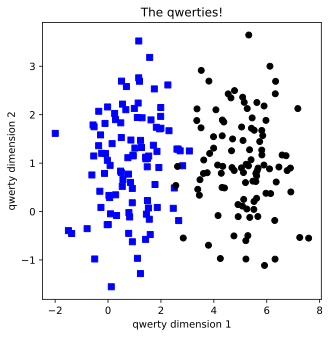

In [2]:
# Create Data
nPerClust = 100
blur = 1

#
A = [ 1,1]
B = [ 5,1]

# generate data
# add some noise to the data with std:blur
# so that there can be a distribution with a center indicated above
a = [ A[0] + np.random.randn(nPerClust)*blur , A[1] + np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur , B[1] + np.random.randn(nPerClust)*blur]

# concat them into one data matrix
data_np = np.hstack((a,b)).T

# true labels
labels_np = np.vstack(( np.zeros((nPerClust,1)) , np.ones((nPerClust,1)) ))

# convert to pytorch tensor - probably np library has more functions to construct and reshape data?
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# plot the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[ np.where(labels==0)[0], 0], data[ np.where(labels==0)[0], 1], 'bs')
plt.plot(data[ np.where(labels==1)[0], 0], data[ np.where(labels==1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [4]:
# Build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   # input layer with 2 input(x1,x2) and 1 output
    nn.ReLU(),        # activation layer
    nn.Linear(1,1),   # output unit
    nn.Sigmoid()      # final activation unit
)

# other model features
learning_rate = .01

# loss function
# Binary Cross Entropy Loss problem
lossfun = nn.BCELoss()
# Note: we will learn in the metaparametrs section that its better to use "BCEWithLogitsLoss"
# bec python developers itself implement sigmoid layer itsel in it which is more stable
# so they suggest NOT to include sigmoid function itself in your model, the loss function will do it

# optimizer
# SGD: stochasitc gradient
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

In [5]:
# Train the model

numEpochs = 1000
losses = torch.zeros(numEpochs)

for epochi in range(numEpochs):

  # forward prop
  yHat = ANNclassify(data) # gives the prediction

  # calculate loss
  loss = lossfun(yHat, labels) # actual output is labels
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward() # backprop depend on the loss, need to optimize Weights depend on the loss
  optimizer.step()

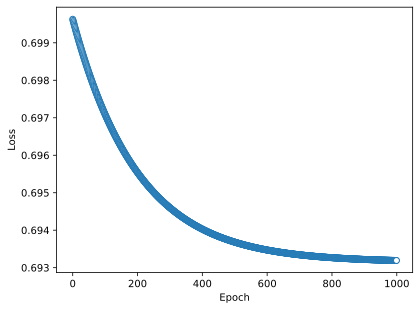

In [6]:
# Plot the losses

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth =.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [7]:
# Compute the predictions

# final forward pass
predictions = ANNclassify(data) # obviously for now the training and testing dataset are the same
# find predicted lables to calculate errors
predlabels = predictions>.5 # will be 1, o.w. will be 0

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy in %
totalacc = 100-100*len(misclassified)/(2*nPerClust) # nPerClust for A + nPerClust for B = 2*nPerClust

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 50%


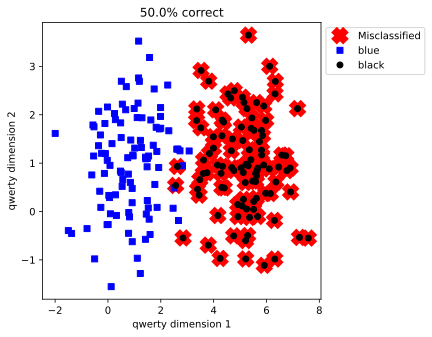

In [8]:
# Plot the labeled data
fig = plt.figure(figsize = (5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize=12, markeredgewidth = 8)
plt.plot(data[ np.where(labels==0)[0], 0], data[ np.where(labels==0)[0], 1], 'bs')
plt.plot(data[ np.where(labels==1)[0], 0], data[ np.where(labels==1)[0], 1], 'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()